In [90]:
from dateutil.parser import parse
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

### Import time series

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'])
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


### Panel data

Panel data is also a time based dataset.

The difference is that, in addition to time series, it also contains one or more related variables that are measured for the same time periods.

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df = df.loc[df.market=='DELHI', :]
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2013,DELHI,January,2003,246040,146,370,280,DEL,DELHI,January-2003
2014,DELHI,January,2004,206360,471,1065,928,DEL,DELHI,January-2004
2015,DELHI,January,2005,237510,212,551,489,DEL,DELHI,January-2005
2016,DELHI,January,2006,246900,390,598,541,DEL,DELHI,January-2006
2017,DELHI,January,2007,190560,808,1215,1022,DEL,DELHI,January-2007


### Visualizing a time series

               value
date                
1991-07-01  3.526591
1991-08-01  3.180891
1991-09-01  3.252221
1991-10-01  3.611003
1991-11-01  3.565869


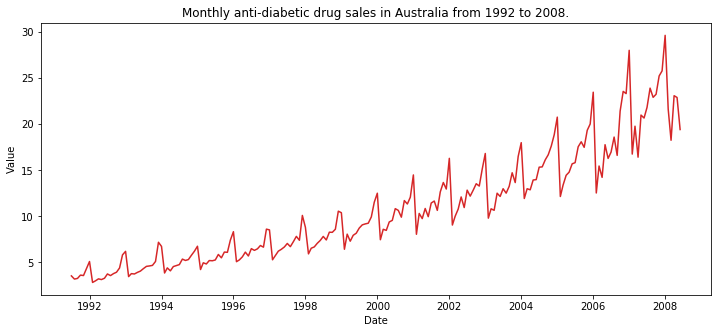

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
print(df.head())

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value'):
    plt.figure(figsize=(12, 5))
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

Since all values are positive, we can show this on both sides of the Y axis to emphasize the growth.

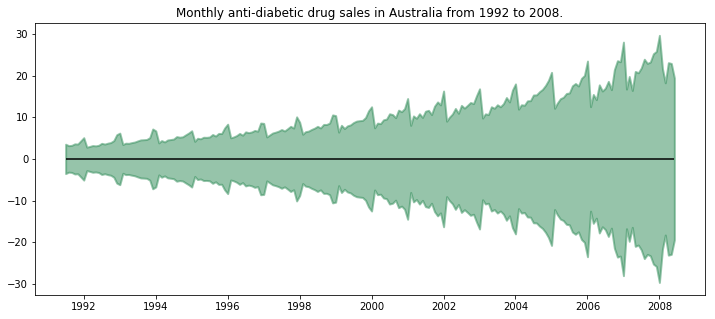

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
plt.fill_between(df.index, y1=df.value, y2=-df.value, alpha=0.5, linewidth=2, color='seagreen')
plt.title('Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')
plt.hlines(y=0, xmin=df.index.min(), xmax=df.index.max(), linewidth=1.5)
plt.show()

### Seasonal Plot of a Time Series

Since its a monthly time series and follows a certain repetitive pattern every year, you can plot each year as a separate line in the same plot. This lets you compare the year wise patterns side-by-side.

In [38]:
# Prepare data
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()
print('Years:', years)
df.head()

Years: [1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008]


,value,year,month
date,,,
1991-07-01,3.526591,1991,Jul
1991-08-01,3.180891,1991,Aug
1991-09-01,3.252221,1991,Sep
1991-10-01,3.611003,1991,Oct
1991-11-01,3.565869,1991,Nov


In [39]:
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)
mycolors

array(['xkcd:vivid purple', 'xkcd:bright lavender', 'xkcd:sapphire',
       'xkcd:dark fuchsia', 'xkcd:dusky pink', 'xkcd:dusty purple',
       'xkcd:dark tan', 'xkcd:orange brown', 'xkcd:red orange',
       'xkcd:clear blue', 'xkcd:lemon', 'xkcd:bluish grey',
       'xkcd:dark blue grey', 'xkcd:pale violet', 'xkcd:orangey yellow',
       'xkcd:cool grey', 'xkcd:green', 'xkcd:ice'], dtype='<U31')

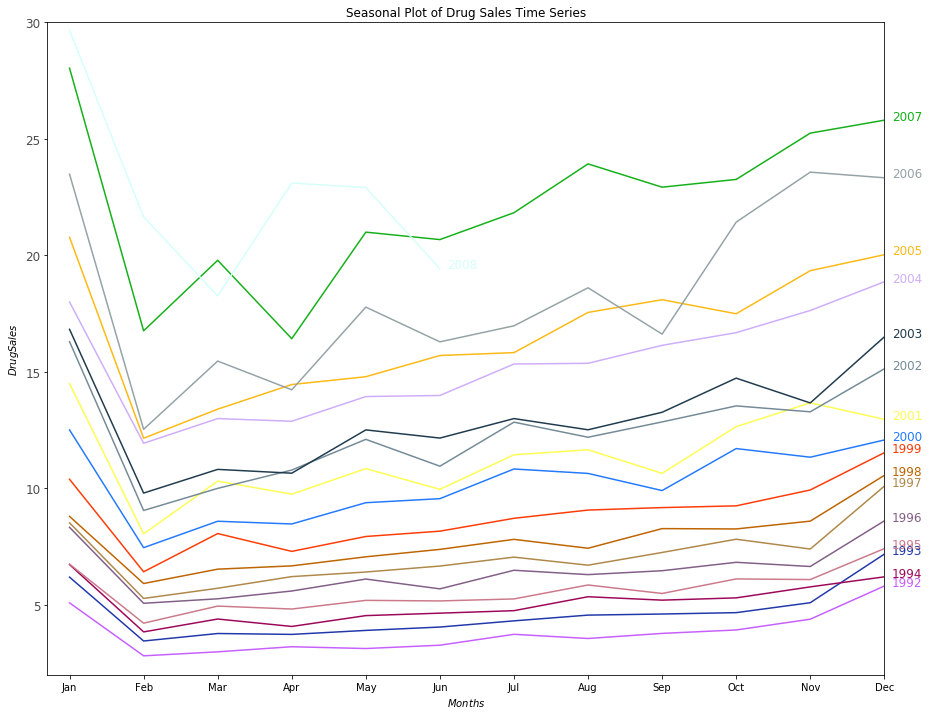

In [55]:
# Draw Plot
plt.figure(figsize=(15, 12))
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Drug Sales$', xlabel='$Months$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of Drug Sales Time Series")
plt.show()

There is a steep fall in drug sales every February, rising again in March, falling again in April and so on. Clearly, the pattern repeats within a given year, every year.

However, as years progress, the drug sales increase overall. We can nicely visualize this trend and how it varies each year in a nice year-wise boxplot. Likewise, we can do a month-wise boxplot to visualize the monthly distributions.

### Boxplot of Month-wise (Seasonal) and Year-wise (trend) Distribution

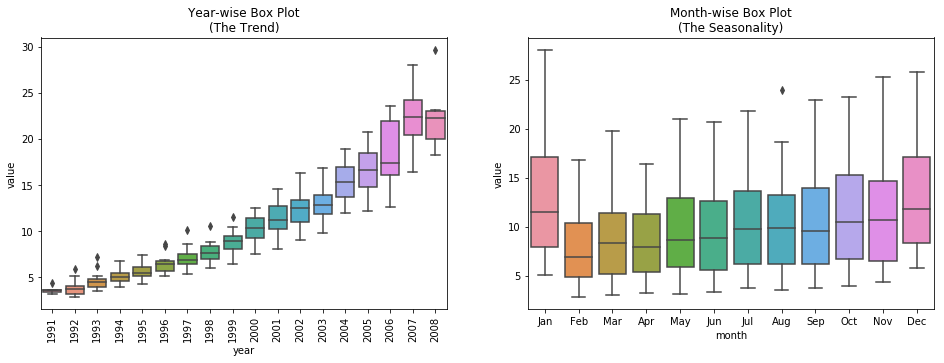

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :]) # To begin in january
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=12)
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=12)
plt.show()

The boxplots make the year-wise and month-wise distributions evident. Also, in a month-wise boxplot, the months of December and January clearly has higher drug sales, which can be attributed to the holiday discounts season.

So far, we have seen the similarities to identify the pattern. Now, let's find out deviations from the usual pattern.

### Patterns in a time series

Any time series may be split into the following components: **Base Level + Trend + Seasonality + Error**

- **Base Level:** is the ground true signal without any bias.
- **Trend:** is observed when there is an increasing or decreasing slope observed in the time series.
- **Seasonality:** is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors.
- **Error:**: is the random variation (*noise*) in the series.

However, it's not a mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality. The opposite can also be true.

So, a time series can be imagined as a combination of the trend, seasonality and the error terms.

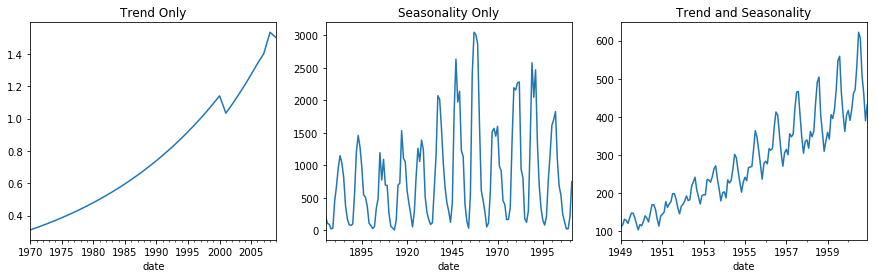

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2])

Another aspect to consider is the **cyclic** behaviour. It happens when the rise and fall pattern in the series does not happen in fixed calendar-based intervals. Care should be taken to not confuse *cyclic* effect with *seasonal* effect.

So, how to diffentiate between a *cyclic* vs *seasonal* pattern?

If the patterns are not of fixed calendar based frequencies, then it is cyclic. Because, unlike the seasonality, cyclic effects are typically influenced by the business and other socio-economic factors.

### Additive and multiplicative time series

Depending on the nature of the trend and seasonality, a time series can be modeled as an *additive* or *multiplicative*, wherein, each observation in the series can be expressed as either a *sum* or a *product* of the components:

- **Additive time series:** 

$Value = Base Level + Trend + Seasonality + Error$

- **Multiplicative Time Series:** 

$Value = Base Level * Trend * Seasonality * Error$

### How to decompose a time series into its components?

We can do a classical decomposition of a time series by considering the series as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.

The `seasonal_decompose` function in `statsmodels` package implements this conveniently.

<Figure size 1080x1080 with 0 Axes>

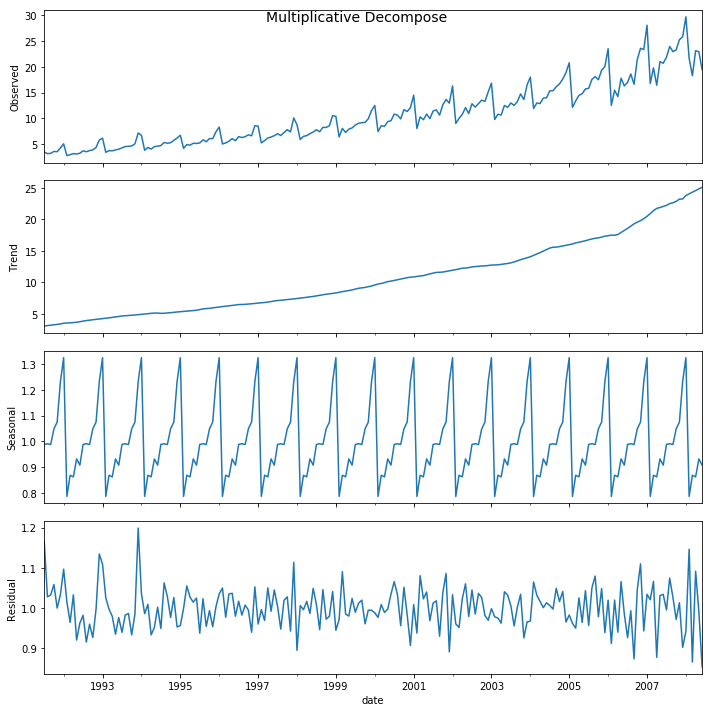

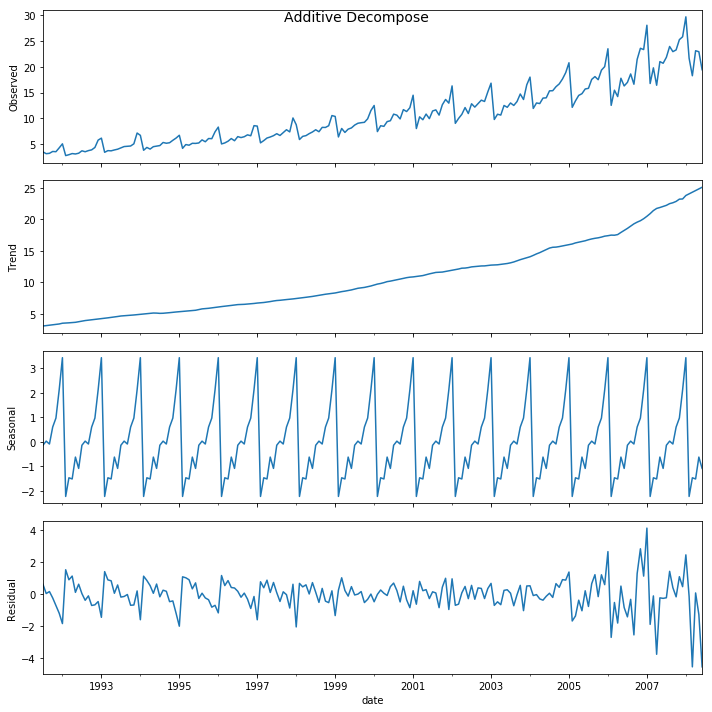

In [103]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
plt.figure(figsize=(15, 15))
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=14)
result_add.plot().suptitle('Additive Decompose', fontsize=14)
plt.show()

Setting `extrapolate_trend='freq'` takes care of any missing values in the trend and residuals at the beginning of the series.

If we look at the residuals of the additive decomposition closely, it has some pattern left over. The multiplicative decomposition, however, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

The numerical output of the trend, seasonal and residual components are stored in the result_mul output itself. Let’s extract them and put it in a dataframe.

In [104]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,0.987845,3.060085,1.166629,3.526591
1991-08-01,0.990481,3.124765,1.027745,3.180891
1991-09-01,0.987476,3.189445,1.032615,3.252221
1991-10-01,1.048329,3.254125,1.058513,3.611003
1991-11-01,1.074527,3.318805,0.999923,3.565869


If we check, the product of `seas`, `trend` and `resid` columns should exactly equal to the actual values.

### Stationary and Non-Stationary Time Series